In [3]:
import pandas as pd
import plotly.express as px
# ^^^ pyforest auto-imports - don't write above this line
import os
import codecs
import numpy.random as nr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.precision', 10)
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly_express as px

#for l2 normalization
import sklearn.preprocessing



import re
import spacy

#initiate spacy with english language
#nlp = spacy.load('en_core_web_sm')
import en_core_web_sm
nlp = en_core_web_sm.load()
from pattern.en import suggest
import nltk

#phrase modeling
from gensim.models.word2vec import LineSentence
from gensim.models.phrases import Phrases , Phraser
import string
from nltk import pos_tag

# NLTK Stop words
from nltk.corpus import stopwords

from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize
from gensim.models.word2vec import Text8Corpus
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import gensim
from gensim import corpora
from gensim.corpora import Dictionary, MmCorpus

#clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#for creating wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add('Microsoft')
stopwords.add('Teams')

#lines below let allow multiple results from a line of code to be shown e.g. df.head() + df.columns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#import fasttext
import fasttext 
import sister

import umap
import hdbscan

# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()


import plotly
from plotly import version
print (version)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

C:\Users\fulto\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


<module 'plotly.version' from 'C:\\Users\\fulto\\anaconda3\\lib\\site-packages\\plotly\\version.py'>


In [93]:
os.chdir('C:\\Users\\fulto\\Desktop\\Driver Analysis\\Teams')

In [14]:
df_2 = pd.read_csv('teams_web_verbatims_since_Jan_2020.csv')

In [92]:
def scrub_text(df, text_column, trigrams = False, lemmatize = False):
    
    '''
    
    This function takes a column of text and cleans it, while also performing phrase modeling on the column
    
    '''
    
    #get all reviews into list
    data = list(df[text_column].values)


    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
    data_words = list(sent_to_words(data))  
    
    # Build the bigram and trigram models
    #the min_count determines if the model ignores all words and bigrams with total collected count lower than this value.
    bigram = gensim.models.Phrases(data_words, min_count=1, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], min_count = 1, threshold=100)

    #get a sentence as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    
    # Define functions for stopwords, bigrams, trigrams and lemmatization
    def remove_stopwords(texts):
        stopwords.add('microsoft')
        stopwords.add('teams')
        return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

    def make_bigrams(texts):
        return [bigram_mod[doc] for doc in texts]

    def make_trigrams(texts):
        return [trigram_mod[bigram_mod[doc]] for doc in texts]
    
#     lemmatizing produces an actual english word as a root as opposed to stemming which may not be a real word
    def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """https://spacy.io/api/annotation"""
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        return texts_out
    
    # Remove Stop Words
    data_words_nostops = remove_stopwords(data_words)
    
    if trigrams == True:
   
        # Form trigrams
        data = make_trigrams(data_words)

        # Do lemmatization keeping only noun, adj, vb, adv
    if lemmatize == True:
        
        data = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
    
        data = lemmatization(data_words_bigrams, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])
    
    else:
        
        data = make_bigrams(data_words_nostops)
        
    #take all of the lemmatized and trigrammed reviews and dump them into a new column
    df['scrubbed_text'] = [x for x in data]
        
    #convert column of lists to strings
    df['scrubbed_text'] = df['scrubbed_text'].apply(', '.join)

    #remove commas from strings
    df['scrubbed_text'] = df['scrubbed_text'].str.replace(',','')

    return df

In [7]:
#run text through scrubber
df = scrub_text(df, 'Feedback_Verbatim', trigrams = False)

In [9]:
df.head(1)

Feedback_ID            Feedback_DateTime  \
0  flnps_v2_071883a81c4158b6adc31ab5a36c4832  2020-07-17 20:33:35.0000000   

  Feedback_Source Feedback_Platform Feedback_UserType  \
0  Teams           Web               Commercial         

                      Feedback_TenantId  Feedback_Rating  \
0  0f50271f-5c9a-49bf-8ebb-6f09433f06b6  7                 

                                                                                                                       Feedback_Verbatim  \
0  I have difficulty showing some videos and applying games, because it keeps crashing all the time. No more, nothing to complain about.   

  Feedback_SurveyName  Feedback_RatingValue  Feedback_RatingScale  \
0  App EndUser NPS     0                     10                     

   Feedback_SystemLocale Feedback_SurveyFlightName  Feedback_IsValidFlight  \
0 NaN                     [""]                      1                        

  Feedback_App Feedback_VerbatimLanguage  \
0  Teams        pt                         

                                                                                                      Feedback_SourceVerbatim  \
0  tenho dificuldades de mostrar alguns vÃ­deos e aplicar jogos, pois fica travando a todo momento. No mais, nada a reclamar.   

   User_IsLinkedIn  User_IsCoviewer  User_IsCollaborator  User_IsContributor  \
0 NaN              NaN              NaN                  NaN                   

   User_IsAsyncCoEditor                            Feedback_OcvId1  \
0 NaN                    flnps_v2_071883a81c4158b6adc31ab5a36c4832   

  Device_OfficeBuild Device_OsBuild Device_OsUserLocale Device_Channel  \
0  0.0.0.20200612     10             Unknown             CC              

   Device_OsName  Device_OsSku Device_OfficeUiLanguage  Device_OsLocaleTag  \
0 NaN            NaN            Portuguese (Brazil)    NaN                   

   Device_ClientCountry  Device_FirstRunTime Device_DeviceManufacturer  \
0 NaN                   NaN                   Unknown                    

  Device_DeviceModel  Device_OfficeArchitectureText  Device_ProcTypeText  \
0  Unknown           NaN                            NaN                    

   Device_ProcessorCount  Device_ProcSpeedMHz  Device_RamMB  \
0 NaN                    NaN                  NaN             

   Device_NumProcPhysCores  Device_SysVolSizeMB  Device_SysVolFreeSpaceMB  \
0 NaN                      NaN                  NaN                         

   Device_HorizontalResolution  Device_VerticalResolution  Device_ScreenDpi  \
0 NaN                          NaN                        NaN                 

   Device_InstallType  Device_OfficeLicensingACID_LicenseName Device_Browser  \
0 NaN                 NaN                                      chrome          

   Device_BrowserVersion Device_TelemetryPlatform  Device_AppMode  \
0  84.0                   windows                 NaN               

   Device_AppModeExt  Device_Host Device_TeamsClientVersion  \
0 NaN                NaN           1415/1.0.0.2020061225      

   Device_TeamsDesktopVersion Device_TeamsLicenseType Device_TeamsRing  \
0 NaN                          Teacher                 general           

                          User_SurveyId  User_Country  User_A13Region  \
0  e94092b6-fa9b-4de6-a1dc-9b2424e293a0 NaN           NaN               

  User_LicenseModel User_Commercial_TenantState  \
0  Subscription      Active                       

       User_Commercial_TenantName  User_Commercial_MSSalesTopParentOrgId  \
0  COLÃ‰GIO SÃƒO FRANCISCO XAVIER  9854213.0                               

                       User_Commerical_MSSalesTopParentOrgName  \
0  ASSOCIACAO NOBREGA DE EDUCACAO E ASSISTENCIA SOCIAL - ANEAS   

   User_Commercial_TotalEnabledUsers  User_Commercial_HasEducation  \
0  1381.0                             1.0                            

   User_Commercial_TotalAvailableUnits  \
0  30391.0                               

  User_Commercial_CreateDate

## Overall Wordcloud

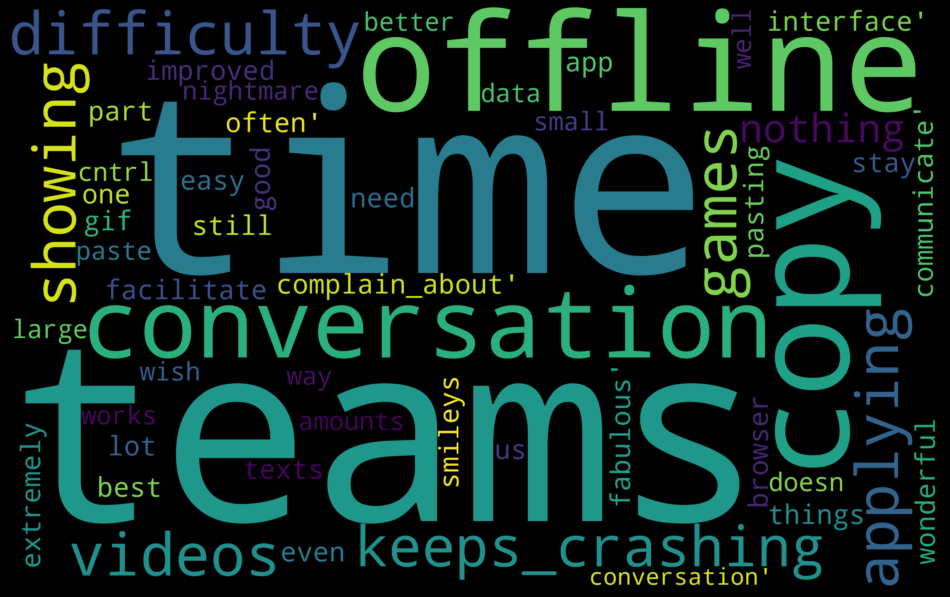

In [11]:
text = df.scrubbed_text.values
wordcloud = WordCloud(width = 2650, height = 1650, background_color = 'black', stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(figsize = (13, 10), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show();

In [12]:
#create embeddings for each query
bert_embedding = sister.BertEmbedding(lang="en")

#using BERT to create embeddings
vectors = [bert_embedding(sent) for sent in df.scrubbed_text]

#convert to df
verbatim_vectors = pd.DataFrame(vectors)

#normalizing word vectors to improve similarity performance https://stats.stackexchange.com/questions/177905/should-i-normalize-word2vecs-word-vectors-before-using-them
# research says that using the l2 norm improves model performance more than any other normalization method https://www.groundai.com/project/improving-bert-fine-tuning-wit
#h-embedding-normalization/1
#so we are using the l2 norm here for unit norm transformation
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
normed_vectors = sklearn.preprocessing.normalize(verbatim_vectors, norm = 'l2', axis = 1)

#make the actual queries the index of each embedding
normed_vectors = pd.DataFrame(normed_vectors)
normed_vectors.index = [x for x in df['Feedback_Verbatim']]

#send vectors to csv in case the kernel dies
#normed_vectors.to_csv('all_teams_verbatims_vectors.csv')

Token indices sequence length is longer than the specified maximum sequence length for this model (698 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1520 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1243 > 512). Running this sequence through the model will result in indexing errors


In [13]:
normed_vectors.shape

(8800, 768)

In [14]:
df.shape

(8800, 326)

In [15]:
normed_vectors.to_csv('teams_web_verbatim_vectors.csv')

## Cluster Verbatims
### Leaf clustering
HDBSCAN supports an extra parameter cluster_selection_method to determine how it selects flat clusters from the cluster tree hierarchy. The default method is 'eom' for Excess of Mass, the algorithm described in How HDBSCAN Works. This is not always the most desireable approach to cluster selection. If you are more interested in having small homogeneous clusters then you may find Excess of Mass has a tendency to pick one or two large clusters and then a number of small extra clusters. In this situation you may be tempted to recluster just the data in the single large cluster. Instead, a better option is to select 'leaf' as a cluster selection method. This will select leaf nodes from the tree, producing many small homogeneous clusters. Note that you can still get variable density clusters via this method, and it is also still possible to get large clusters, but there will be a tendency to produce a more fine grained clustering than Excess of Mass can provide.

In [8]:
normed_vectors = pd.read_csv('teams_web_verbatim_vectors.csv', index_col = 0)

In [80]:
# reduce vectors, then cluster them -- https://umap-learn.readthedocs.io/en/latest/clustering.html
reducer = umap.UMAP(n_neighbors=30, n_components = 3, min_dist = 0)
reduced_vectors = reducer.fit_transform(normed_vectors)

In [81]:
#use HDBSCAN for clustering the embeddings, then reduce to 3d then plot -- super important protip here, if you want to have more fine-grained clusters, rather than just one 
#large cluster and a few small ones (which is what I was getting with the default "Excess of Mass" setting that HDBSCAN has) then set the cluster_selection_method to 'leaf'
#this will select leaf nodes from the tree, producing many small homogeneous clusters (Remember, HDBSCAN is hierarchical!!!)
#-- https://hdbscan.readthedocs.io/en/latest/parameter_selection.html
cluster_labels = hdbscan.HDBSCAN(min_cluster_size=100, min_samples = 1, cluster_selection_method = 'leaf').fit_predict(reduced_vectors)

In [82]:
#creating a df for the embeddings and clusters
reduced_vectors = pd.DataFrame(reduced_vectors)

reduced_vectors.index = [x for x in normed_vectors.index]

reduced_vectors['cluster'] = [x for x in cluster_labels]

print(f'{reduced_vectors.cluster.nunique()} unique clusters found')

24 unique clusters found


In [83]:
reduced_vectors.cluster.value_counts()

-1     3109
 13    560 
 3     372 
 15    356 
 6     345 
 18    342 
 11    335 
 19    318 
 17    294 
 14    271 
 1     262 
 7     242 
 22    235 
 5     209 
 20    207 
 16    194 
 10    192 
 12    167 
 21    153 
 8     153 
 9     147 
 4     123 
 0     110 
 2     104 
Name: cluster, dtype: int64

In [106]:
from collections import Counter
Counter(" ".join(reduced_vectors.reset_index().iloc[:, 0].astype(str)).split()).most_common(1)

[('the', 7669)]

In [84]:
reduced_vectors.rename(columns = {0:'dim1', 1:'dim2', 2:'dim3'}, inplace = True)

In [89]:
reduced_vectors.head()

dim1  \
I have difficulty showing some videos and applying games, because it keeps crashing all the time. No more, nothing to complain about.                                                                                                                                                                                                                                                                                                                                                                                                                         9.2141561508   
They have improved a lot, we still need to facilitate the interface                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           9.7673587799   
TIMES OUT TO OFTEN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            8.3471260071   
To do a good job you need the right tool. So if I had in my grasp the right tool to do my job would be enough. I notice that some features have been subtracted from some tools.  When I acquired the hardware, the machine came with some factory installed programs. I had no resources for software update and the programs i had over time was deteriorating and losing some functionality.  If it were to do quality work, the government would have made professionals available to oversee the tools or utilities needed for teachers to do the work.  7.8264522552   
Doesn't work at all on Windows 7 VDI machine provided to me by the organization. Web version is slow to respond with no  Give CONTROL functionality                                                                                                                                                                                                                                                                                                                                                                                                           8.1541452408   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      dim2  \
I have difficulty showing some videos and applying games, because it keeps crashing all the time. No more, nothing to complain about.                                                                                                                                                                                                                                                                                                                                                                                                                         5.1823105812   
They have improved a lot, we still need to facilitate the interface                  

In [86]:
reduced_vectors.to_csv('teams_web_verbatim_clusters.csv')

In [82]:
reduced_vectors_2 = pd.read_csv('teams_web_verbatim_clusters.csv', index_col = 0)

In [83]:
reduced_vectors_2.head(1)

dim1  \
I have difficulty showing some videos and applying games, because it keeps crashing all the time. No more, nothing to complain about.  9.214156   

                                                                                                                                            dim2  \
I have difficulty showing some videos and applying games, because it keeps crashing all the time. No more, nothing to complain about.  5.1823106   

                                                                                                                                            dim3  \
I have difficulty showing some videos and applying games, because it keeps crashing all the time. No more, nothing to complain about.  12.314417   

                                                                                                                                       cluster  
I have difficulty showing some videos and applying games, because it keeps crashing all the time. No more, nothing to complain about.  22

In [9]:
#Now I want to use UMAP to visualize the clusters, so I am going to be using the full vectors and reduce them again -- setting min_dist higher so that we can separate points more
reducer_2 = umap.UMAP(n_components = 3)
reduced_vectors_2 = reducer_2.fit_transform(normed_vectors)

In [79]:
# reduced_vectors_2 = pd.DataFrame(reduced_vectors_2)
# reduced_vectors_2['cluster'] = [x for x in reduced_vectors['cluster']]

# reduced_vectors_2.rename(columns = {0:'dim1', 1:'dim2', 2:'dim3'}, inplace = True)

#reduced_vectors_2['cluster'] = reduced_vectors_2['cluster'].astype(str)

reduced_vectors_2 = reduced_vectors_2[reduced_vectors_2['cluster'] != '-1'].dropna()

In [85]:
clusters = {0:'Little Slow', 1:'Robust', 2:'none', 3:'Easy Use', 4:'Easy Use (2)', 5:'Sometimes Stutters', 6:'Works Well', 7:'Easy Use (3)', 8:'Every Day',
           9:'Talk Friends', 10:'Web Version', 11:'Web Version (2)', 12:'Really Good', 13:"Doesn't Work", 14:'Video Call', 15:'Desktop App', 16:'Every Time', 
           17:'Good Platform', 18:'Desktop App', 19:'Little Confusing', 20:'Takes Time', 21:'Screen Sharing', 22:'Video Calls'}

reduced_vectors_2['cluster'] = reduced_vectors_2['cluster'].map(clusters)

In [86]:
reduced_vectors_2.cluster.unique()

array(['Video Calls', 'Good Platform', nan, 'Little Confusing',
       'Web Version (2)', 'Easy Use', 'Screen Sharing', "Doesn't Work",
       'Every Day', 'Every Time', 'Desktop App', 'Video Call',
       'Takes Time', 'Works Well', 'Really Good', 'Sometimes Stutters',
       'Easy Use (2)', 'Little Slow', 'Web Version', 'Robust',
       'Easy Use (3)', 'Talk Friends', 'none'], dtype=object)

In [87]:
reduced_vectors_2['cluster'] = reduced_vectors_2['cluster'].astype(str)

In [68]:
reduced_vectors_2.isna().dropna(inplace = True)

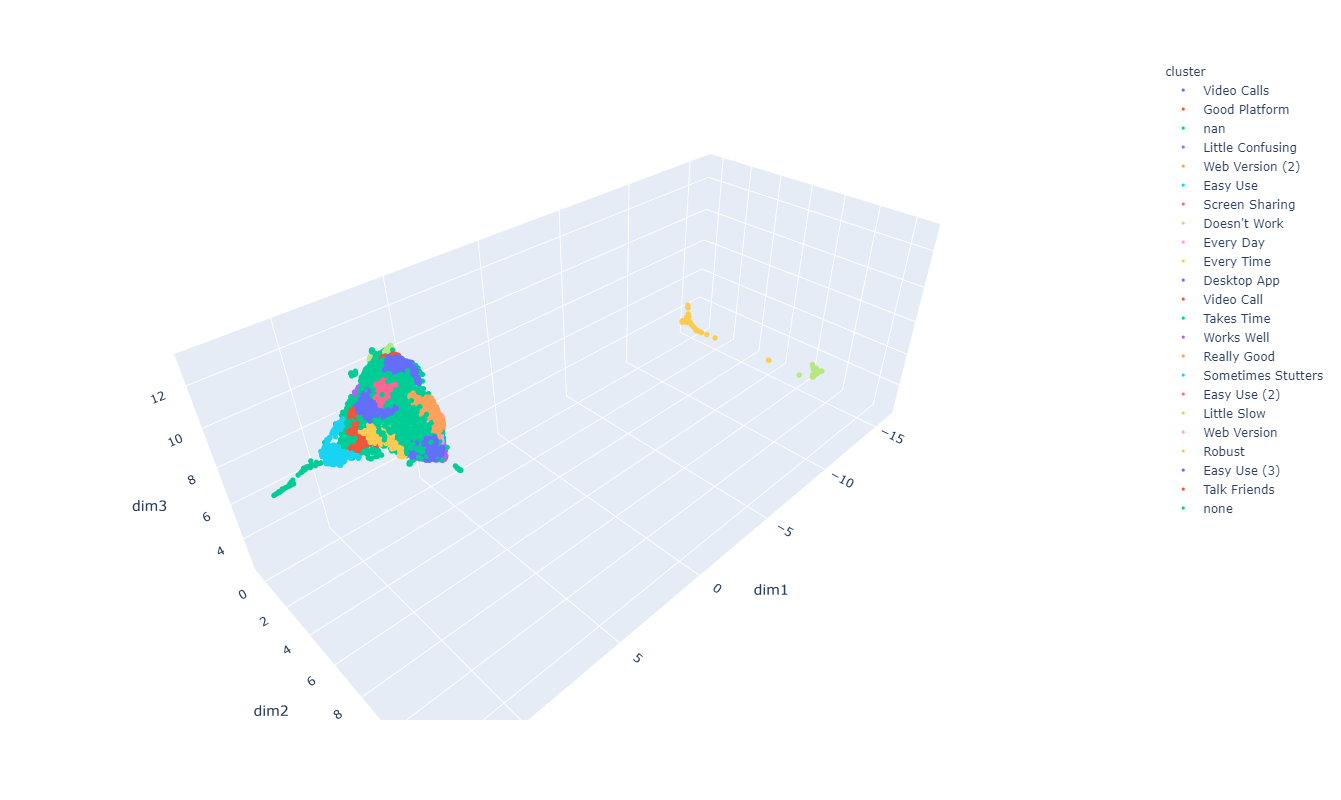

In [91]:
# import plotly
# plotly.offline.init_notebook_mode(connected=True)
#vecs['cluster'] =vecs['cluster'].astype(str)
fig = px.scatter_3d(reduced_vectors_2, x='dim1', y='dim2', z='dim3', color='cluster', width = 800, height = 800)
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))
#fig.show()

## Sentiment Analysis With Hugging Face Transformer Model

In [109]:
from transformers import pipeline

nlp = pipeline('sentiment-analysis')

sentiments = []

for x in reduced_vectors.index:
    
    try:
    
        sentiments.append(nlp(x)[0])
    
    except:
        
        sentiments.append('none')

In [111]:
reduced_vectors['sentiment'] = [x for x in sentiments]

In [124]:
reduced_vectors.to_csv('teams_web_verbatims_clustered_with_sentiment.csv')

In [136]:
df = pd.read_csv('teams_web_verbatims_clustered_with_sentiment.csv')

In [137]:
df['Feedback_DateTime'] = [x for x in df_2['Feedback_DateTime']]

In [138]:
df.rename(columns = {'Unnamed: 0':'Feedback_Verbatim'}, inplace = True)

In [139]:
df = df[df['cluster'] != -1]

In [140]:
df.shape

(5691, 7)

In [141]:
df = scrub_text(df, 'Feedback_Verbatim', trigrams=False)

In [142]:
import collections
import nltk
nltk.download('punkt')

def cluster_name(cluster):
    
    counts = collections.Counter()
    name_df = df.copy()

    name_df['scrubbed_text'] = name_df['scrubbed_text'].str.replace('in|on|OH|is|YEAH|YEH|!|It|gun|pirhana|microsoft|teams|how|to|%|www|https|.com|:', '')
    for sent in name_df[name_df['cluster'] == cluster]['scrubbed_text']:
        words = nltk.word_tokenize(sent)
        counts.update(nltk.bigrams(words))
    return counts.most_common(5)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fulto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [143]:
df.dropna(inplace = True)

In [101]:
[cluster_name(x) for x in range(0, 24)]

[[(('d', 'know'), 4),
  (('little', 'slow'), 3),
  (('fails', 'lot'), 1),
  (('lockg', 'much'), 1),
  (('dt', 'know'), 1)],
 [(('little', 'robust'), 1)],
 [(('aƒ', 'aƒ'), 743),
  (('_oh', 'yeah_'), 117),
  (('yeah_', 'oh_yeah'), 116),
  (('oh_yeah', '_oh'), 116),
  (('aƒsaƒ', 'aƒ'), 34)],
 [(('easy', 'use'), 9),
  (('video', 'calls'), 6),
  (('ease', 'use'), 6),
  (('video', 'quality'), 6),
  (('video', 'call'), 4)],
 [(('easy', 'use'), 51),
  (('hard', 'use'), 5),
  (('time', 'load'), 3),
  (('simple', 'easy'), 3),
  (('good', 'easy'), 3)],
 [(('sometimes', 'stutters'), 3),
  (('thank', 'much'), 2),
  (('applique', 'goool'), 1),
  (('remd', 'later'), 1),
  (('later', 'answer'), 1)],
 [(('works', 'well'), 2),
  (('good', 'bad'), 2),
  (('helpful', 'useful'), 2),
  (('sometimes', 'doesn'), 2),
  (('gog', 'great'), 2)],
 [(('easy', 'use'), 6),
  (('works', 'well'), 5),
  (('school', 'work'), 4),
  (('use', 'school'), 4),
  (('pretty', 'good'), 4)],
 [(('every', 'day'), 3),
  (('workg', '

In [146]:
pos = df[df['sentiment'].str.contains('POS')]
neg = df[df['sentiment'].str.contains('NEG')]
pos['sentiment'] = 'positive'
neg['sentiment'] = 'negative'
df = pd.concat([pos, neg], axis = 0)

In [147]:
df['Feedback_DateTime'] = pd.to_datetime(df['Feedback_DateTime'])

In [158]:
cluster_trends = pd.DataFrame(df.groupby(df['Feedback_DateTime'].dt.week).cluster.value_counts()).rename(columns = {'cluster':'count'}).reset_index()
cluster_trends = cluster_trends[~cluster_trends['cluster'].str.contains('none')]

In [159]:
#cluster_trends['Feedback_DateTime'] = cluster_trends['Feedback_DateTime'].map({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June'})

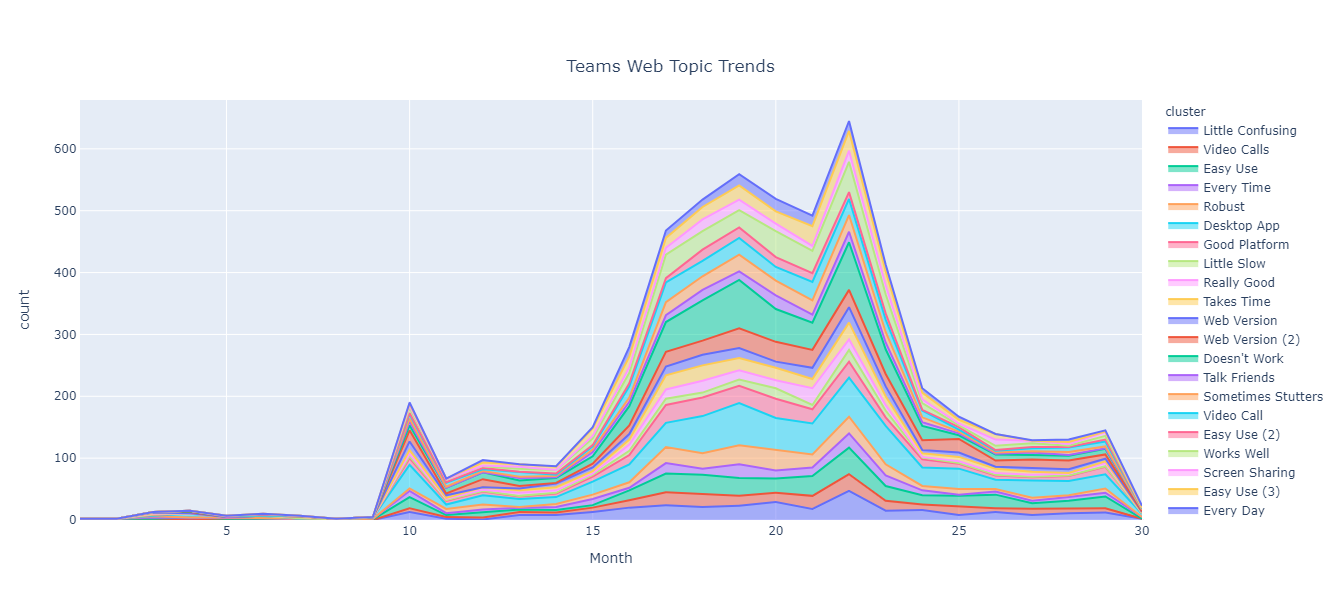

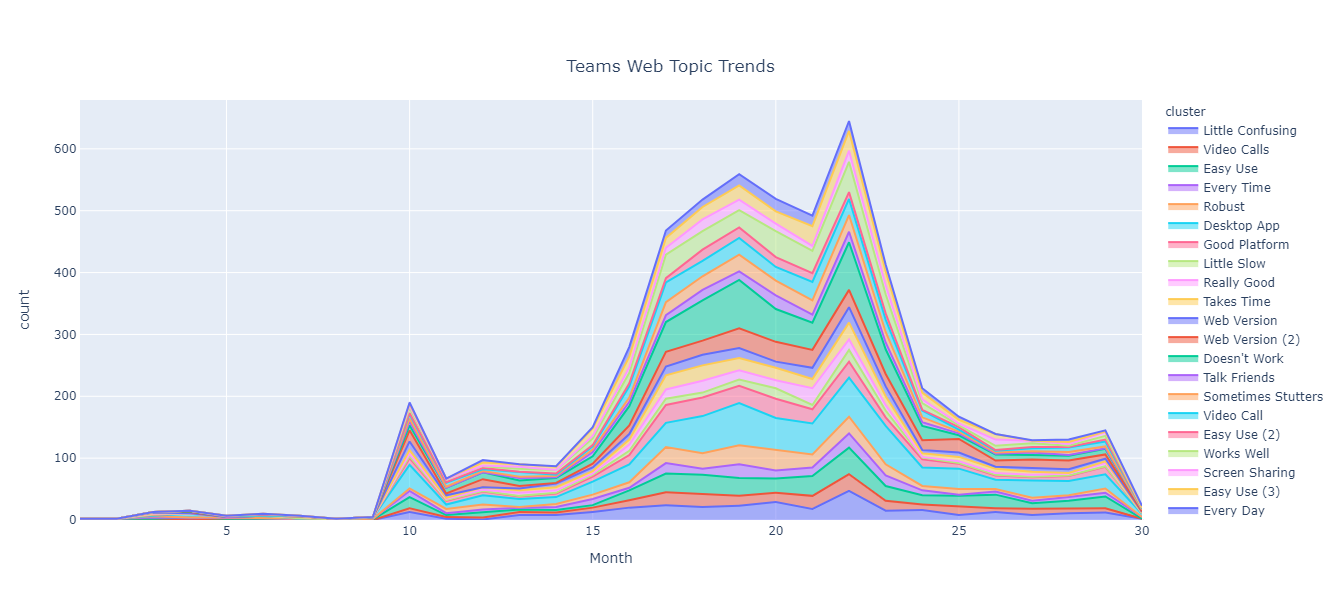

In [160]:
fig = px.area(cluster_trends, x="Feedback_DateTime", y="count", color="cluster",
	      line_group="cluster", labels = {'Feedback_DateTime':'Month'}, width = 1100, height = 600, title = 'Cluster Size by Month')
fig.update_layout(
    title={
        'text': "Teams Web Topic Trends",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

Text(0.5, 1.0, 'Nearly 60% of Teams Web Feedback is Negative')

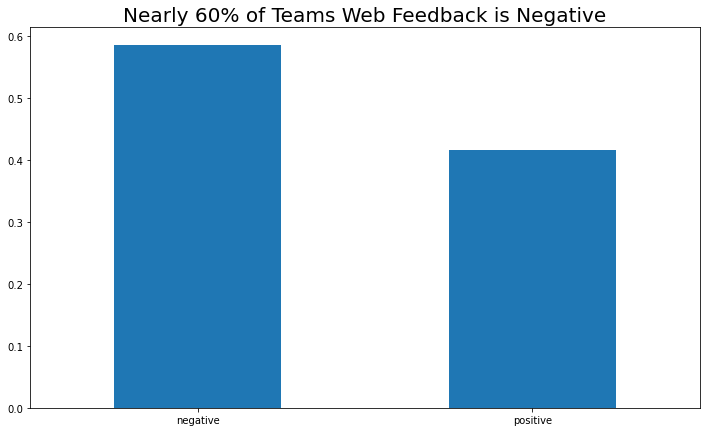

In [131]:
df.sentiment.value_counts(normalize = True).plot(kind= 'bar', figsize = (12, 7))
plt.xticks(rotation = 0)
plt.title('Nearly 60% of Teams Web Feedback is Negative', fontsize = 20)